EJERCICIO

Usando el archivo 'housing.csv', determine los pares de variables que pueden llegar a tener una relacion lineal simple. Para esto, lo mas conveniente es hacerlo por medio de una visualizacion usando seaborn y su funcion pairplot.

Una vez exploradas las variables, realice la comprobacion de normalidad y genere el modelo de regresion lineal utilizando los dos metodos visto. Evalue los errores correspondientes y grafique las rectas con sus correspondientes intervalos de confianza.

In [59]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
%matplotlib inline
plt.style.use('seaborn')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [60]:
datos = pd.read_csv('housing.csv')
datos=datos.sort_values('RM')
datos.head()

,RM,LSTAT,PTRATIO,MEDV
353,3.561,7.12,20.2,577500.0
355,3.863,13.33,20.2,485100.0
389,4.138,23.34,20.2,249900.0
357,4.138,37.97,20.2,289800.0
367,4.368,30.63,20.2,184800.0


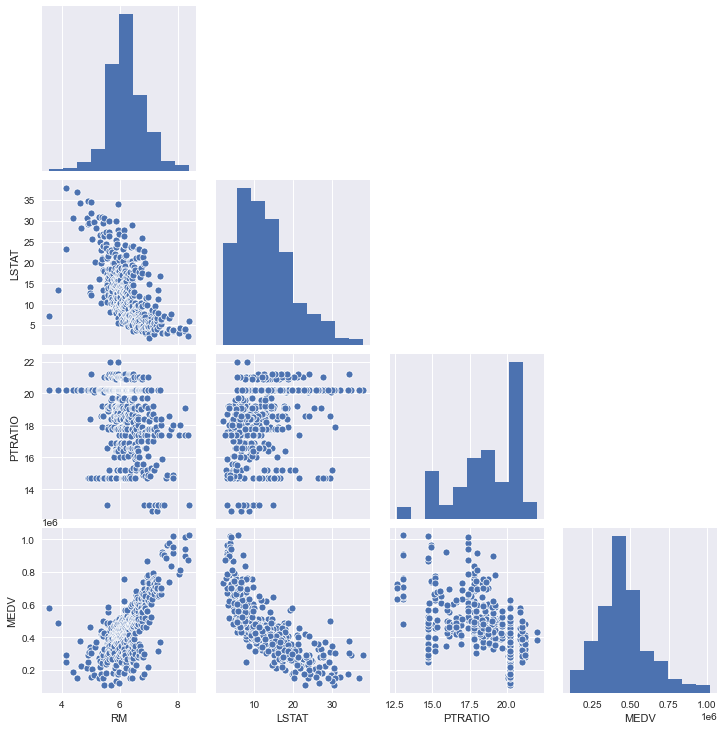

In [61]:
sns.pairplot(datos,corner=True)

Al ver estos graficos podemos concluir MEDV vs RM, MEDV vs LSTAT y LSTAT con RM parecen tener una relación lineal por lo cual vamos a probarlas. 

In [62]:
#Para empezar debemos ver si mis datos son normales:
stats.shapiro(datos['RM']), stats.shapiro(datos['MEDV']),stats.shapiro(datos['LSTAT'])
#Todos son menores que el pvalue de 0.05 por lo tanto los datos no son normales. 
#y toca usar la prueba de kendall no pearson
#En este caso mi H0 es Si está distribuido normalmente. Si mi Pvalue>0.05 los datos son normales
#en este caso uso el de pearson para corr_test=corr_test = stats.pearsonr(x=datos['RM'],y=datos['MEDV'])
#SI MI PVALUE<0.05 uso a kendall

(ShapiroResult(statistic=0.970818281173706, pvalue=2.7105865996190914e-08),
 ShapiroResult(statistic=0.9596613645553589, pvalue=2.5757390664793434e-10),
 ShapiroResult(statistic=0.9371760487556458, pvalue=1.6900520425407878e-13))

In [65]:
# Correlación lineal entre las  variables
# ==============================================================================
corr_test1 = stats.kendalltau(x = datos['RM'], y =  datos['MEDV'])
print("Coeficiente de correlación de Kendall RM vs MEDV: ", corr_test1[0])
print("P-value: ", corr_test1[1])
#0.47 ES PEQUEÑO pero no tanto, la recta puede explicar  el 47% de la variabilidad. 
#Solo da noción del 47% generalmente se cambia de estimador.
#Se puede escalar para que quede en un rango. 
corr_test2 = stats.kendalltau(x = datos['LSTAT'], y =  datos['MEDV'])
print("Coeficiente de correlación de Kendall RM vs LSTAT: ", corr_test2[0])
print("P-value: ", corr_test2[1])
#Esta es la mejor -0.65
corr_test3 = stats.kendalltau(x = datos['RM'], y =  datos['LSTAT'])
print("Coeficiente de correlación de Kendall RM vs LSTAT: ", corr_test3[0])
print("P-value: ", corr_test3[1])

Coeficiente de correlación de Kendall RM vs MEDV:  0.47249315511106627
P-value:  9.983146011545853e-55
Coeficiente de correlación de Kendall RM vs LSTAT:  -0.6597876526231294
P-value:  5.958897961620702e-105
Coeficiente de correlación de Kendall RM vs LSTAT:  -0.45400079726994663
P-value:  7.542182047879431e-51


In [70]:
def regresion(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0,
                                                   shuffle = True)
    #train:entrena modelo
    #test: prueba el modelo. que tan bien quedo
    # Creación del modelo usando scikit learn
    # ==============================================================================
    modelo = LinearRegression()
    modelo.fit(X_train.reshape(len(X_train),1), y_train)
    #ajustando los datos al modelo.
    # Información del modelo
    # ==============================================================================
    print("Intercept:", modelo.intercept_)
    print("Coeficiente:", ['RM', modelo.coef_[0]])
    print("Coeficiente de determinación R^2:", modelo.score(X.reshape(len(X),1), y))
    #r2: que tanto se ajusta el modelo a los datos. ese modelo logra dar 48% de la 
    #variabilidad de la var respuesta. 
    # Gráfica del modelo
    # ==============================================================================
    fig,ax=plt.subplots(figsize=(8,6))
    ax.scatter(X_train,y_train)
    ax.plot(X_train,modelo.predict(X_train.reshape(len(X_train),1)),c='r')
    # Error de test del modelo 
    # ==============================================================================
    predicciones = modelo.predict(X_test.reshape(-1,1))
    #el -1 es para q tome todos los posibles valores
    rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
    print("")
    print(f"El error (rmse) de test es: {rmse}")
    #diferencia promedio (ejey) entre las variables 

Intercept: -682385.2335633395
Coeficiente: ['RM', 181573.66724770074]
Coeficiente de determinación R^2: 0.4855178827451262

El error (rmse) de test es: 133040.05061537673


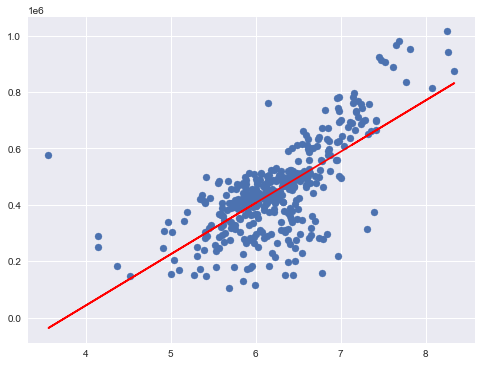

In [71]:
#Separando los valores en X y y = RM vs MEDV
X = datos.loc[:,'RM'].values
y = datos.loc[:,'MEDV'].values
regresion(X,y)

Intercept: 678363.5822802269
Coeficiente: ['RM', -17554.138405571193]
Coeficiente de determinación R^2: 0.5781843035570732

El error (rmse) de test es: 120910.35571289482


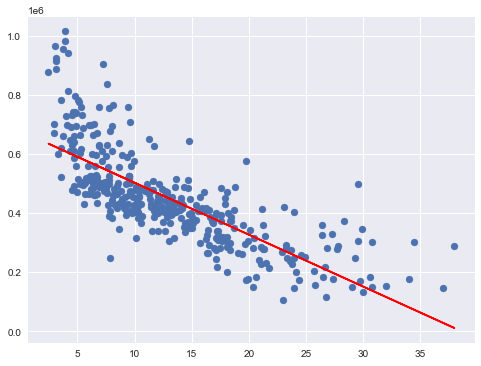

In [72]:
#Separando los valores en X y y = LSTAT vs MEDV 
X = datos.loc[:,'LSTAT'].values
y = datos.loc[:,'MEDV'].values
regresion(X,y)

Intercept: 56.04332561541413
Coeficiente: ['RM', -6.900607394381425]
Coeficiente de determinación R^2: 0.3743205952749884

El error (rmse) de test es: 5.830419416682212


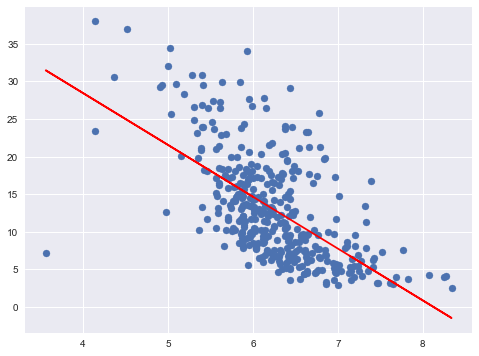

In [74]:
#Separando los valores en X y y = RM vs LSTAT  
X = datos.loc[:,'RM'].values
y = datos.loc[:,'LSTAT'].values
regresion(X,y)

In [76]:
def modelostat(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0,
                                                   shuffle = True)
    # Creación del modelo 
    # ==============================================================================
    X_train = sm.add_constant(X_train, prepend=True)
    modelo = sm.OLS(endog=y_train, exog=X_train)
    modelo = modelo.fit()
    print(modelo.summary())
    #En este caso mi H0: Esta variable de COEF no debe de ir, para ello miro t-student: 
    #P>|t| mayor a 0.05 acepto H0 y saco el coef
    #P>|t| menor a 0.05 rechazo H0 y acepto el coef
    #en este caso me dio menor por lo cual acepto el coef.
    
    # Predicciones con intervalo de confianza del 95%
    # ==============================================================================
    predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
    
    # Predicciones con intervalo de confianza del 95%
    # ==============================================================================
    predicciones['x'] = X_train[:, 1]
    predicciones['y'] = y_train
    predicciones = predicciones.sort_values('x')

    # Gráfico del modelo
    # ==============================================================================
    fig, ax = plt.subplots(figsize=(9, 7))

    ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
    ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
    ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
    ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
    ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
    ax.legend();
    
    # Error de test del modelo 
    # ==============================================================================
    X_test = sm.add_constant(X_test, prepend=True)
    predicciones = modelo.predict(exog = X_test)
    rmse = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
    print(f"\nEl error (rmse) de test es: {rmse}")
    
    


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     376.9
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           3.38e-59
Time:                        11:53:01   Log-Likelihood:                -5109.4
No. Observations:                 391   AIC:                         1.022e+04
Df Residuals:                     389   BIC:                         1.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.824e+05   5.86e+04    -11.641      0.0

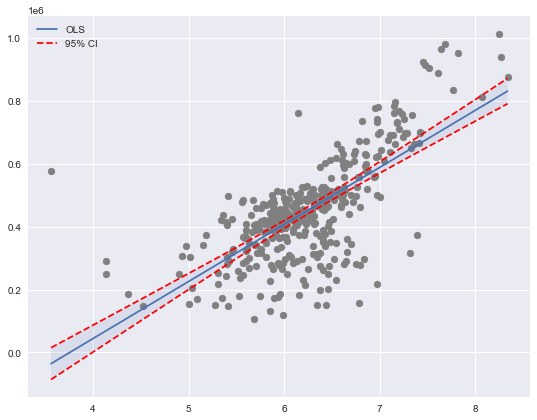

In [77]:
#Separando los valores en X y y = RM vs MEDV
X = datos.loc[:,'RM'].values
y = datos.loc[:,'MEDV'].values
modelostat(X,y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     547.6
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           3.19e-76
Time:                        11:53:11   Log-Likelihood:                -5070.1
No. Observations:                 391   AIC:                         1.014e+04
Df Residuals:                     389   BIC:                         1.015e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.784e+05   1.11e+04     61.227      0.0

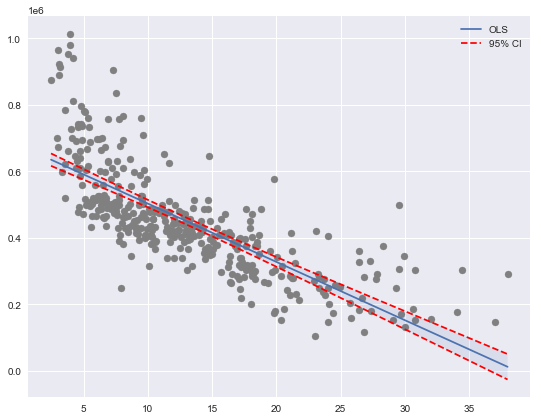

In [78]:
#Separando los valores en X y y = LSTAT vs MEDV 
X = datos.loc[:,'LSTAT'].values
y = datos.loc[:,'MEDV'].values
modelostat(X,y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     233.0
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           1.46e-41
Time:                        11:53:17   Log-Likelihood:                -1223.9
No. Observations:                 391   AIC:                             2452.
Df Residuals:                     389   BIC:                             2460.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.0433      2.833     19.781      0.0

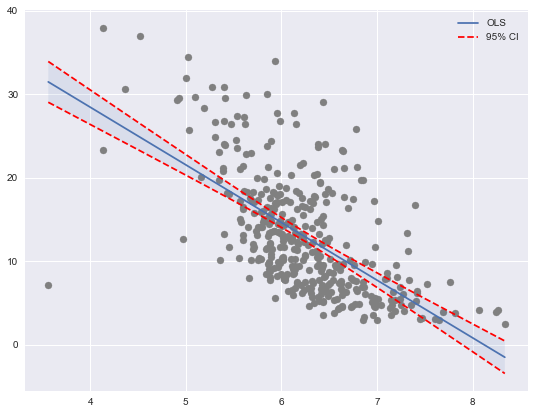

In [79]:
#Separando los valores en X y y = RM vs LSTAT  
X = datos.loc[:,'RM'].values
y = datos.loc[:,'LSTAT'].values
modelostat(X,y)

Podemos confiar en los intervalos de confianza del 95% para esta prueba asumiendo que 
realmente se relacionan linealmente.Homocedasticidad.